In [1]:
library(phyloseq)
library(vegan)
library(ggplot2)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4



In [2]:
otu <- as.matrix(read.table("hugorepset.otus", header = T, row.names = 1))
OTU = otu_table(otu, taxa_are_rows=T)

taximat = as.matrix(read.table("tax.clean", header=T, row.names=1))
taxi=tax_table(taximat)

tomate <- phyloseq(OTU,taxi)

tomate



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 255275 taxa and 107 samples ]
tax_table()   Taxonomy Table:    [ 255275 taxa by 6 taxonomic ranks ]

In [3]:
sample_data = read.table("metadata.txt", header = T, row.names = 1, sep = "\t")
head(sample_data)
sampledata = sample_data(data.frame(kind=sample_data$kind, row.names=sample_names(tomate)))
tomate <- phyloseq(OTU,taxi, sampledata)
tomate

,kind
,<chr>
DGORZ,ruderal
GTO1EC,endo
GTO1RZ,ruderal
GTO2RZ,ruderal
GTO3EC,endo
GTO3RZ,ruderal


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 255275 taxa and 107 samples ]
sample_data() Sample Data:       [ 107 samples by 1 sample variables ]
tax_table()   Taxonomy Table:    [ 255275 taxa by 6 taxonomic ranks ]

In [4]:
# tomato_samples <- subset_samples(tomate, kind == "tomato")
# tomato_samples
# # head(otu_table(tomato_samples))

# tomato_samples_filtered <- filter_taxa(tomato_samples, function(x) any(x != 0), TRUE)
# tomato_samples_filtered                           

# head(otu_table(filtered_phyloseq))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 255275 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 1 sample variables ]
tax_table()   Taxonomy Table:    [ 255275 taxa by 6 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 24209 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 1 sample variables ]
tax_table()   Taxonomy Table:    [ 24209 taxa by 6 taxonomic ranks ]

In [3]:
# tomato_glom <- tax_glom(tomate, taxrank="genus")
# tomato_glom

#El objeto anterior tarda algo en calcularse, si se retoman los cálculos no queremos volver a comenzar
# save.image("tomato_glom.RData")
load("tomato_glom.RData")


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 255275 taxa and 107 samples ]
sample_data() Sample Data:       [ 107 samples by 1 sample variables ]
tax_table()   Taxonomy Table:    [ 255275 taxa by 6 taxonomic ranks ]


Attaching package: ‘igraph’


The following object is masked from ‘package:vegan’:

    diversity


The following object is masked from ‘package:permute’:

    permute


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1748 taxa and 107 samples ]
sample_data() Sample Data:       [ 107 samples by 1 sample variables ]
tax_table()   Taxonomy Table:    [ 1748 taxa by 6 taxonomic ranks ]

,330,400,425,519,590,818,840,886,896,900,⋯,2353888,2387866,2424837,2496254,2496867,2496979,2568236,2568393,2569090,2569848
330,1.0000000,0.64906477,-0.04257960,0.3028384,0.48078262,0.28684184,0.21509455,0.4501961,0.37718224,0.41573857,⋯,0.09084312,-0.05734332,-0.07746615,0.32937482,-0.014524887,-0.02632006,0.148849681,0.24316877,0.14843815,0.3455238
400,0.6490648,1.00000000,0.07937324,0.6438648,0.49790974,0.61611472,0.57620005,0.7812575,0.62588437,0.49620617,⋯,0.22261973,-0.06652360,-0.08158556,0.30010194,0.012525623,-0.03907360,0.301793368,0.25341642,0.28128778,0.4173688
425,-0.0425796,0.07937324,1.00000000,0.1313243,-0.03524252,-0.04471565,-0.05181265,0.1668160,0.02710312,0.06771647,⋯,-0.03026153,-0.01270502,-0.01716345,-0.02646758,-0.011465839,-0.01305545,-0.009433962,-0.01112111,-0.02045833,0.3878249
519,0.3028384,0.64386481,0.13132430,1.0000000,0.64432765,0.50860119,0.76435702,0.8774072,0.78918142,0.33157058,⋯,0.24612313,-0.05983074,-0.07709326,0.22149532,0.033242043,-0.04776536,0.070750259,0.15317722,0.08398330,0.3517110
590,0.4807826,0.49790974,-0.03524252,0.6443277,1.00000000,0.33098616,0.54345694,0.5256998,0.55020322,0.35505851,⋯,0.14632360,-0.04746224,-0.06411762,0.30879893,0.005410486,-0.04877132,-0.035242519,0.25091115,0.07421397,0.1619729
818,0.2868418,0.61611472,-0.04471565,0.5086012,0.33098616,1.00000000,0.54891901,0.6169722,0.43434291,0.47158592,⋯,0.09433889,-0.06022002,-0.08135234,0.10641802,0.021667544,0.05463197,0.205458193,0.37122681,0.18785481,0.3973692


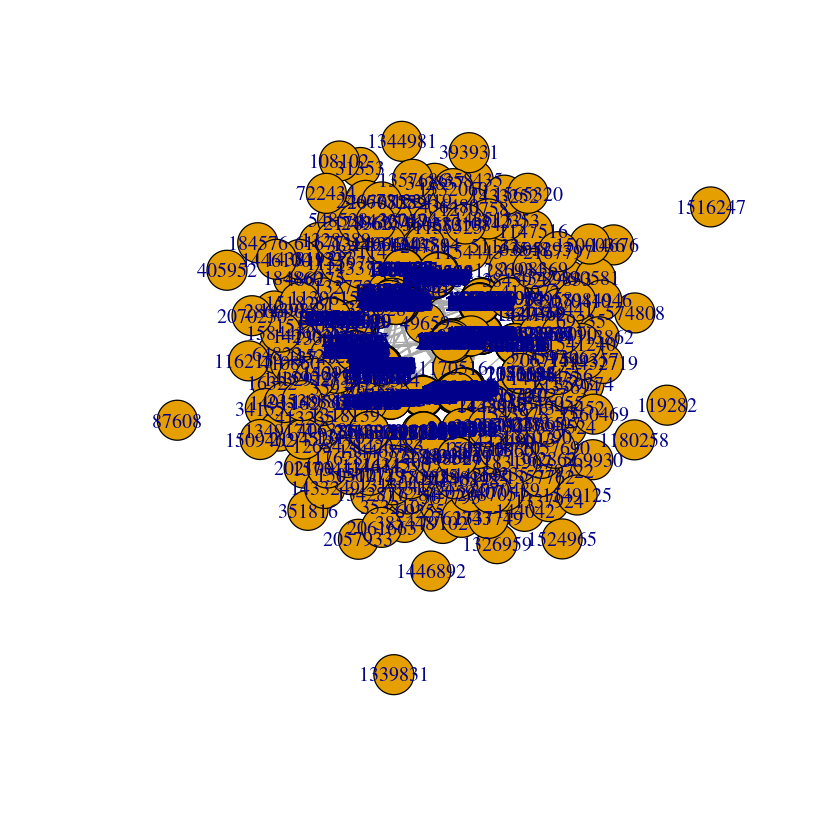

In [4]:
library(igraph)
ps_genus <- tomato_glom
ps_genus
otu_table_genus <- otu_table(ps_genus)
correlation_matrix <- cor(t(otu_table_genus))
head(correlation_matrix)

# Assuming 'correlation_matrix' is your original correlation matrix
cor_matrix <- correlation_matrix

# Set all negative values to 0
cor_matrix[cor_matrix < 0.7] <- 0

# Create an igraph object
graph <- graph.adjacency(cor_matrix, mode = "undirected", weighted = TRUE, diag = FALSE)

# Plot the graph
plot(graph)

# Assuming 'taxa_data' contains your taxonomic data
taxa_data <- as(data.frame(tax_table(tomato_glom)), "matrix")

# Add phylum and genus attributes to vertices
V(graph)$phylum <- taxa_data[match(V(graph)$name, rownames(taxa_data)), "phylum"]
V(graph)$genus <- taxa_data[match(V(graph)$name, rownames(taxa_data)), "genus"]
write.graph(graph, file = "solirubrobacter.graphml", format = "graphml")

In [11]:
num_vertices <- vcount(graph)
cat ("num of vertices", num_vertices, "\n")

num_edges <- ecount(graph)
cat ("num of edges", num_edges, "\n")

density <- edge_density(graph)
cat ("network density", density, "\n")

degree_centrality <- degree(graph)

# degree_values
mean_degree <- mean(degree_centrality)
median_degree <- median(degree_centrality)
range_degree <- range(degree_centrality)
sd_degree <- sd(degree_centrality)

cat ("centrality mean =", mean_degree,"centrality_range =",range_degree, "SD degree=", sd_degree, "\n")

# closeness_values
closeness_centrality <- closeness(graph)
mean_closeness <- mean(closeness_centrality, na.rm = TRUE)  # na.rm = TRUE to remove NA values if present
median_closeness <- median(closeness_centrality, na.rm = TRUE)
range_closeness <- range(closeness_centrality, na.rm = TRUE)
sd_closeness <- sd(closeness_centrality, na.rm = TRUE)

cat ("closeness mean =", mean_closeness,"closeness_range =",range_closeness, "SD closeness=", sd_closeness, "\n")

# betweenness_values
betweenness_centrality <- betweenness(graph)
mean_betweenness <- mean(betweenness_centrality)
median_betweenness <- median(betweenness_centrality)
range_betweenness <- range(betweenness_centrality)
sd_betweenness <- sd(betweenness_centrality)

cat ("betweenness mean =", mean_betweenness,"betweenness_range =",range_betweenness, "SD betweenness=", sd_betweenness, "\n")


vertex_connectivity <- vertex_connectivity(graph)
cat("vertex_connectivity", vertex_connectivity, "\n")

fg <- cluster_fast_greedy(graph)
modularity_value <- modularity(fg)
cat ("modularity =", modularity_value, "\n")




num of vertices 1748 
num of edges 35034 
network density 0.02294486 
centrality mean = 40.08467 centrality_range = 0 228 SD degree= 41.57629 
closeness mean = 0.01959802 closeness_range = 0.0001222689 1.414295 SD closeness= 0.1351428 
betweenness mean = 1595.773 betweenness_range = 0 29328 SD betweenness= 2626.921 
vertex_connectivity 0 
modularity = 0.5257193 
